In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing
california_housing =fetch_california_housing()

In [3]:
df =pd.DataFrame(california_housing.data ,columns=california_housing.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
df["Price"] =california_housing.target

In [5]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Price         float64
dtype: object

<AxesSubplot: >

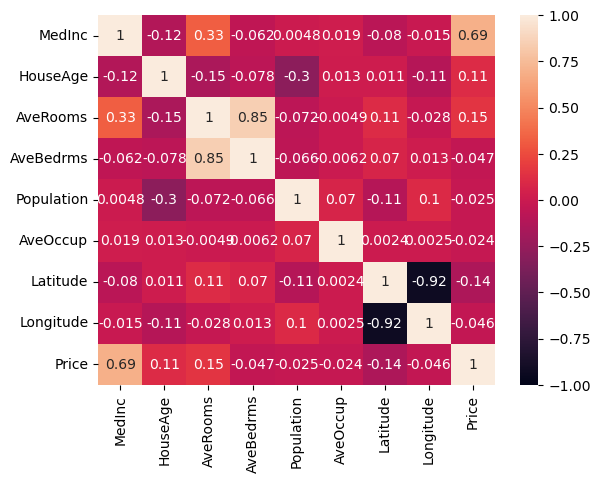

In [18]:
# Whe one feature is explain by all other features

sns.heatmap(df.corr(),annot=True ,vmin=-1, vmax=1)

<Figure size 500x500 with 0 Axes>

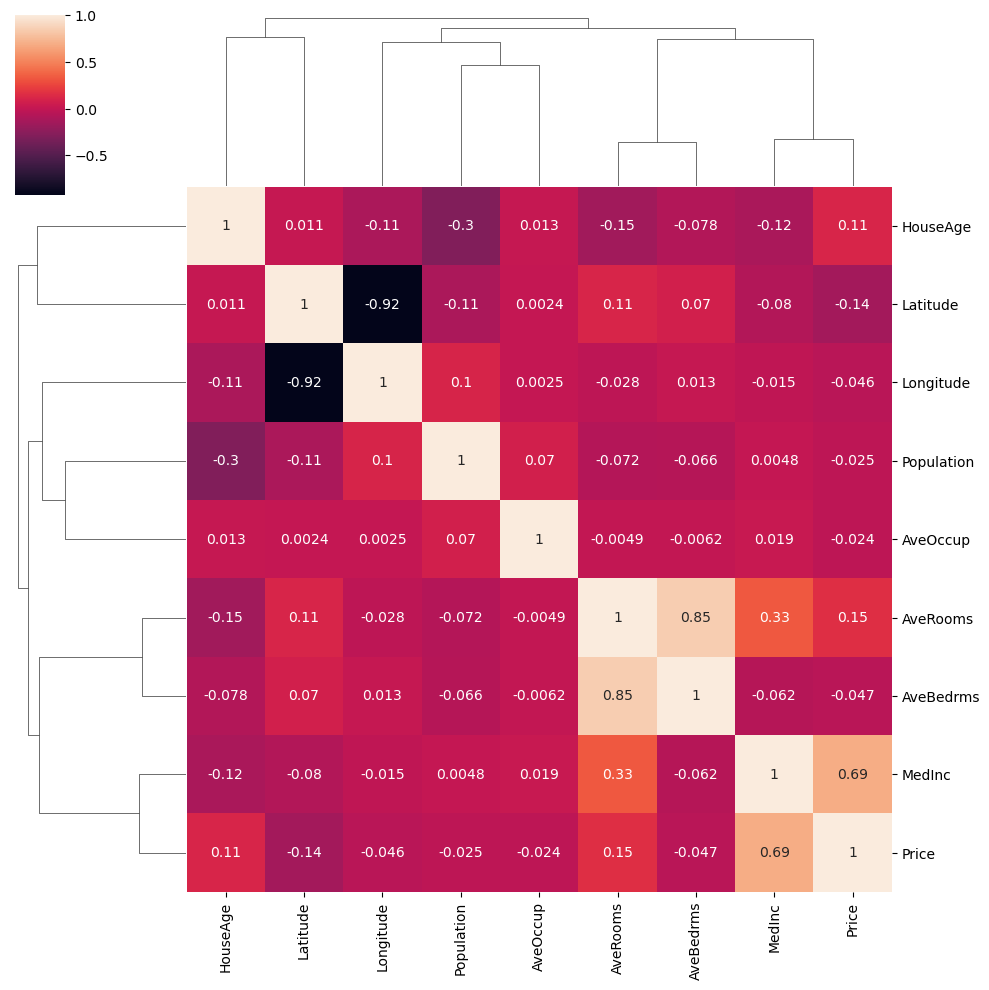

In [19]:
# cluster Map
plt.figure(figsize=(5,5))
sns.clustermap(df.corr(),annot=True)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =pd.DataFrame()
vif["Feature"] =df.columns
vif

,Feature
0,MedInc
1,HouseAge
2,AveRooms
3,AveBedrms
4,Population
5,AveOccup
6,Latitude
7,Longitude
8,Price


In [21]:
vif["VIF"] =[variance_inflation_factor(df.values,i )for i in range(len(df.columns))]   

In [22]:
vif

,Feature,VIF
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211
8,Price,9.285659


In [23]:
df1 =df.copy()

In [24]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [25]:
df1.drop("Longitude",axis=1 ,inplace=True)
vif =pd.DataFrame()
vif["Feature"] =df1.columns
vif["VIF"] =[variance_inflation_factor(df1.values,i )for i in range(len(df1.columns))]   

In [26]:
vif

,Feature,VIF
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,Price,9.193500


In [27]:
df1.drop("AveRooms",axis=1 ,inplace=True)
vif =pd.DataFrame()
vif["Feature"] =df1.columns
vif["VIF"] =[variance_inflation_factor(df1.values,i )for i in range(len(df1.columns))]  

In [28]:
vif

,Feature,VIF
0,MedInc,10.584081
1,HouseAge,7.260588
2,AveBedrms,6.440667
3,Population,2.762794
4,AveOccup,1.098719
5,Latitude,22.094483
6,Price,8.674858


In [29]:
df1.drop("Latitude",axis=1 ,inplace=True)
vif =pd.DataFrame()
vif["Feature"] =df1.columns
vif["VIF"] =[variance_inflation_factor(df1.values,i )for i in range(len(df1.columns))]  

In [30]:
vif

,Feature,VIF
0,MedInc,8.855104
1,HouseAge,4.156145
2,AveBedrms,4.264253
3,Population,2.223926
4,AveOccup,1.098671
5,Price,8.607339


In [31]:
df1

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,0.847


In [47]:
X =df1.iloc[:,:-1]
y =df1.iloc[:,-1]

In [49]:
X

,MedInc,HouseAge,AveBedrms,Population,AveOccup
0,8.3252,41.0,1.023810,322.0,2.555556
1,8.3014,21.0,0.971880,2401.0,2.109842
2,7.2574,52.0,1.073446,496.0,2.802260
3,5.6431,52.0,1.073059,558.0,2.547945
4,3.8462,52.0,1.081081,565.0,2.181467
...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606
20636,2.5568,18.0,1.315789,356.0,3.122807
20637,1.7000,17.0,1.120092,1007.0,2.325635
20638,1.8672,18.0,1.171920,741.0,2.123209


In [50]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split

X_train ,X_test ,y_train ,y_test =train_test_split(X,y,test_size=0.20,random_state=111)
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape 

((16512, 5), (4128, 5), (16512,), (4128,))

In [53]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

In [54]:
X_train =scaler.fit_transform(X_train)
X_test  =scaler.transform(X_test)

In [55]:
X_train

array([[-1.12746696,  1.14692788,  0.01549472, -1.14212905,  0.27200586],
       [-0.28345802, -0.43989971,  0.03454387,  2.33861728, -0.06386383],
       [-1.17536333,  0.75022098, -0.10254167, -0.24000303,  0.0635005 ],
       ...,
       [-1.36268083,  0.82956236, -0.01413097,  0.28840989,  0.06005533],
       [ 0.43820177,  0.51219685, -0.13206195, -0.48508929,  0.07499907],
       [ 0.73148144, -1.86804453, -0.09196226,  2.72884327,  0.03679631]])

In [56]:
X_test

array([[-1.2510807 , -0.20187557, -0.08958739, -0.19915532,  0.05547892],
       [-0.94863275, -0.36055833,  0.53679244, -0.32604395, -0.04753023],
       [-0.14582839,  0.27417271, -0.233736  , -0.13223461, -0.0372945 ],
       ...,
       [ 0.49547719, -0.59858246, -0.08872037,  0.38314182, -0.03472077],
       [ 0.68748422, -2.10606867,  0.41905332,  5.10322504, -0.01216551],
       [ 1.91545453,  1.70231753, -0.22115305, -0.34950966, -0.08227573]])

In [57]:
from sklearn.linear_model import LinearRegression

model =LinearRegression()
model

LinearRegression()

In [58]:
model.fit(X_train ,y_train)

LinearRegression()

In [59]:
model.coef_

array([ 0.82714365,  0.23473076,  0.01903914,  0.03882289, -0.04992006])

In [60]:
model.intercept_

2.0636476907703494

In [62]:
y_pred =model.predict(X_test)

In [63]:
y_pred

array([0.96923087, 1.19429282, 1.99966132, ..., 2.34789156, 2.34464444,
       4.0339177 ])

In [64]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score
MSE =mean_squared_error(y_test ,y_pred)
MSE

0.6790499154210304

In [65]:
mae =mean_absolute_error(y_test ,y_pred)

In [66]:
mae

0.6095102139661707

In [67]:
r2_score(y_test ,y_pred)

0.4926636749037283

### RFE Recursive Feature Eliminations

In [70]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [84]:
from sklearn.feature_selection import RFE
selector =RFE(estimator=LinearRegression(),n_features_to_select=4)

In [85]:
selector

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [86]:
selector.fit(X ,y)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [87]:
selector.support_

array([ True, False, False,  True, False, False,  True,  True])

In [90]:
selector.ranking_

array([1, 3, 2, 1, 5, 4, 1, 1])